In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# total_rain_df = pd.read_sql('SELECT * FROM measurment', engine)
# total_rain_df.tail(1)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
dates_df = session.query(Measurement).order_by(Measurement.date.desc()).first().date
print(dates_df)

2017-08-23


In [12]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime.strptime(dates_df,'%Y-%m-%d') - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Perform a query to retrieve the data and precipitation scores
total_rain_df = []
inches = session.query(Measurement).filter(Measurement.date >= year_ago).all()
for rain in inches:
    if rain.date <= dates_df:
        total_rain_df.append([rain.date, rain.prcp])
total_rain_df

[['2016-08-24', 0.08],
 ['2016-08-25', 0.08],
 ['2016-08-26', 0.0],
 ['2016-08-27', 0.0],
 ['2016-08-28', 0.01],
 ['2016-08-29', 0.0],
 ['2016-08-30', 0.0],
 ['2016-08-31', 0.13],
 ['2016-09-01', 0.0],
 ['2016-09-02', 0.0],
 ['2016-09-03', 0.0],
 ['2016-09-04', 0.03],
 ['2016-09-05', None],
 ['2016-09-06', None],
 ['2016-09-07', 0.05],
 ['2016-09-08', 0.0],
 ['2016-09-09', 0.03],
 ['2016-09-10', 0.0],
 ['2016-09-11', 0.05],
 ['2016-09-12', 0.0],
 ['2016-09-13', 0.02],
 ['2016-09-14', 1.32],
 ['2016-09-15', 0.42],
 ['2016-09-16', 0.06],
 ['2016-09-17', 0.05],
 ['2016-09-18', 0.0],
 ['2016-09-19', 0.0],
 ['2016-09-20', 0.0],
 ['2016-09-21', 0.0],
 ['2016-09-22', 0.02],
 ['2016-09-23', 0.0],
 ['2016-09-24', 0.0],
 ['2016-09-25', 0.0],
 ['2016-09-26', 0.06],
 ['2016-09-27', 0.02],
 ['2016-09-28', 0.0],
 ['2016-09-29', 0.0],
 ['2016-09-30', 0.0],
 ['2016-10-01', 0.0],
 ['2016-10-02', 0.0],
 ['2016-10-03', 0.0],
 ['2016-10-04', 0.0],
 ['2016-10-05', 0.0],
 ['2016-10-06', 0.0],
 ['2016-10-07'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
total_rain_df = pd.DataFrame(total_rain_df)
total_rain_df = total_rain_df.rename(columns={0: 'Date', 1:'precipitation'})
total_rain_df.head()

,Date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [15]:
# Sort the dataframe by date
sorted_date = total_rain_df.sort_values('Date', ascending=True)
sorted_date.head()

,Date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


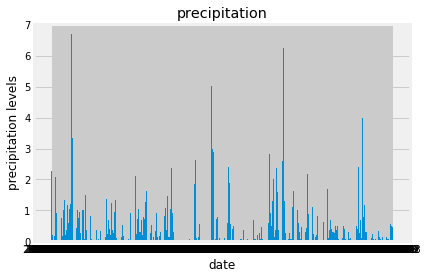

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
x = sorted_date['Date']
y = sorted_date['precipitation']
plt.title(f'precipitation')
plt.ylabel(f'precipitation levels')
plt.xlabel(f'date')
plt.bar(x,y)
plt.show()


![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_count = sorted_date['precipitation'].count()
precip_mean = sorted_date['precipitation'].mean()
precip_std = sorted_date['precipitation'].std()
precip_min = sorted_date['precipitation'].min()
precip_25 = .25/sorted_date['precipitation'].sum()
precip_50 = .50/sorted_date['precipitation'].sum()
precip_75 = .75/sorted_date['precipitation'].sum()
precip_max = sorted_date['precipitation'].max()

print(precip_count)
print(precip_mean)
print(precip_std)
print(precip_min)
print(precip_25)
print(precip_50)
print(precip_75)
print(precip_max)


2015
0.17646153846153778
0.4602883636813204
0.0
0.0007030964367072587
0.0014061928734145175
0.0021092893101217762
6.7


![describe](Images/describe.png)

In [18]:
summary_df = pd.DataFrame({"precipitation": [precip_count, precip_mean, precip_std, precip_min, precip_25, precip_50, precip_75, precip_max]},
                          index=['count','mean','std','min','25%','50%','75%','max'])
summary_df

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000703
50%,0.001406
75%,0.002109
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Measurement.station).distinct().count()
total_stations


9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temps_db = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
temps_db

[(53.0, 87.0, 73.09795396419437)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stations_df = []
highest_obs = session.query(Measurement.date).filter(Measurement.station == 'USC00519281')\
.order_by(Measurement.date.desc()).first().date

highest_obs

'2017-08-18'

In [28]:
last_year_temps = dt.datetime.strptime(highest_obs, '%Y-%m-%d') - dt.timedelta(days=365)
last_year_temps

datetime.datetime(2016, 8, 18, 0, 0)

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
